In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installing Necessary Libraries**

In [6]:
!pip install tensorflow numpy matplotlib scikit-learn opencv-python-headless seaborn


# **Import Libraries**

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import cv2
import pandas as pd


# **Load the Dataset**

In [9]:
dataset_dir = '/content/drive/MyDrive/LEARNFLOW dataset/trafficsign/traffic_Data'
data_dir = os.path.join(dataset_dir, 'DATA')
test_dir = os.path.join(dataset_dir, 'TEST')

# Verify the paths
print(f'DATA directory exists: {os.path.exists(data_dir)}')
print(f'TEST directory exists: {os.path.exists(test_dir)}')

# Debugging: List directory contents
print(f'Contents of DATA directory: {os.listdir(data_dir)}')
for folder in os.listdir(data_dir):  # Checking all folders
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        print(f'Contents of {folder} folder: {os.listdir(folder_path)[:5]}')  # Show first 5 images as a sample
print(f'Contents of TEST directory: {os.listdir(test_dir)[:5]}')  # Show first 5 images as a sample


DATA directory exists: True
TEST directory exists: True
Contents of DATA directory: ['13', '14', '12', '17', '1', '16', '10', '11', '15', '0', '2', '18', '25', '19', '21', '20', '22', '24', '26', '23', '30', '29', '32', '28', '3', '31', '27', '33', '35', '34', '42', '44', '36', '38', '37', '39', '4', '41', '40', '43', '46', '49', '5', '45', '48', '50', '53', '47', '52', '51', '6', '57', '7', '56', '55', '9', '8', '54']
Contents of 13 folder: ['013_0015.png', '013_1_0010.png', '013_1_0008.png', '013_0001.png', '013_1_0022_1_j.png']
Contents of 14 folder: ['014_0003.png', '014_0002.png', '014_0013.png', '014_0004.png', '014_0014.png']
Contents of 12 folder: ['012_0011.png', '012_1_0033.png', '012_0012.png', '012_0030.png', '012_0019.png']
Contents of 17 folder: ['017_0064.png', '017_1_0048.png', '017_1_0013.png', '017_0013.png', '017_1_0044.png']
Contents of 1 folder: ['001_0007.png', '001_1_0007_1_j.png', '001_0019.png', '001_0008.png', '001_0010.png']
Contents of 16 folder: ['016_0070.

# **Load and Preprocess the Dataset**

In [11]:
data = []
labels = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = load_img(img_path, target_size=(32, 32))
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(folder)

# Convert to numpy arrays
data = np.array(data, dtype='float32') / 255.0
labels = np.array(labels)

# Encode labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Load test images
test_data = []
test_images = os.listdir(test_dir)
for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    img = load_img(img_path, target_size=(32, 32))
    img_array = img_to_array(img)
    test_data.append(img_array)

test_data = np.array(test_data, dtype='float32') / 255.0


# **Train the Model**

In [14]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(lb.classes_), activation='softmax')  # Number of classes in the dataset
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_traffic_sign_model.h5', monitor='val_loss', save_best_only=True)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=25,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/25
105/105 [==============================] - 9s 75ms/step - loss: 3.3204 - accuracy: 0.1742 - val_loss: 2.7079 - val_accuracy: 0.2698
Epoch 2/25
105/105 [==============================] - 7s 68ms/step - loss: 2.4131 - accuracy: 0.3121 - val_loss: 2.1537 - val_accuracy: 0.3321
Epoch 3/25
105/105 [==============================] - 10s 93ms/step - loss: 2.0819 - accuracy: 0.3744 - val_loss: 1.7703 - val_accuracy: 0.4880
Epoch 4/25
105/105 [==============================] - 7s 65ms/step - loss: 1.7750 - accuracy: 0.4520 - val_loss: 1.5367 - val_accuracy: 0.5192
Epoch 5/25
105/105 [==============================] - 8s 78ms/step - loss: 1.5038 - accuracy: 0.5444 - val_loss: 1.2118 - val_accuracy: 0.6343
Epoch 6/25
105/105 [==============================] - 8s 72ms/step - loss: 1.2832 - accuracy: 0.5860 - val_loss: 1.0543 - val_accuracy: 0.6787
Epoch 7/25
105/105 [==============================] - 8s 78ms/step - loss: 1.0957 - accuracy: 0.6475 - val_loss: 0.8792 - val_accuracy: 0.720

# **Evaluate the Model and Plot Results**

Validation loss: 0.2178039252758026
Validation accuracy: 93.1654691696167%
27/27 [==============================] - 1s 22ms/step


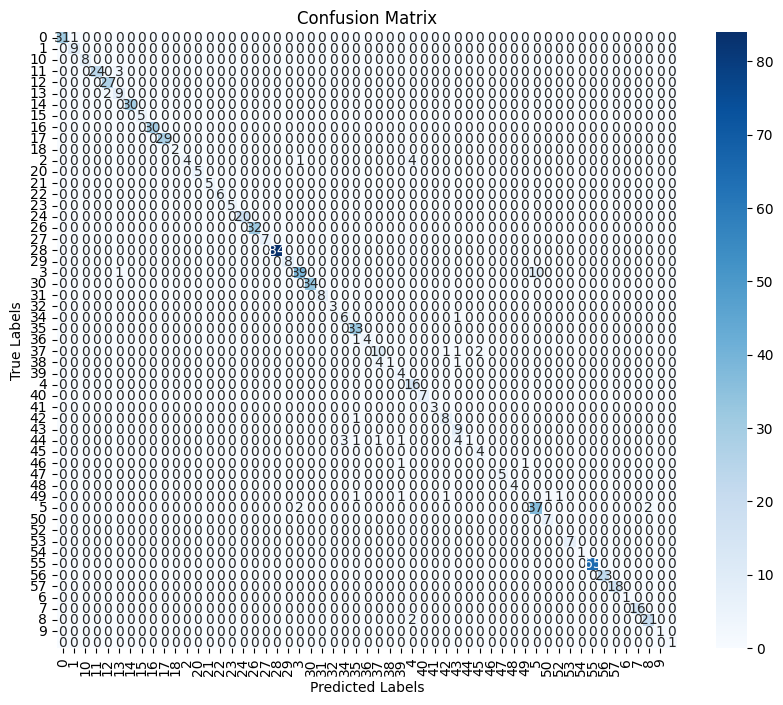

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.90      1.00      0.95         9
          10       1.00      1.00      1.00         8
          11       1.00      0.89      0.94        27
          12       0.93      1.00      0.96        27
          13       0.69      0.82      0.75        11
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00        30
          17       1.00      1.00      1.00        29
          18       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
          20       1.00      0.44      0.62         9
          21       1.00      1.00      1.00         5
          22       1.00      1.00      1.00         5
          23       1.00      1.00      1.00         6
          24       1.00      1.00      1.00         5
          26       1.00    

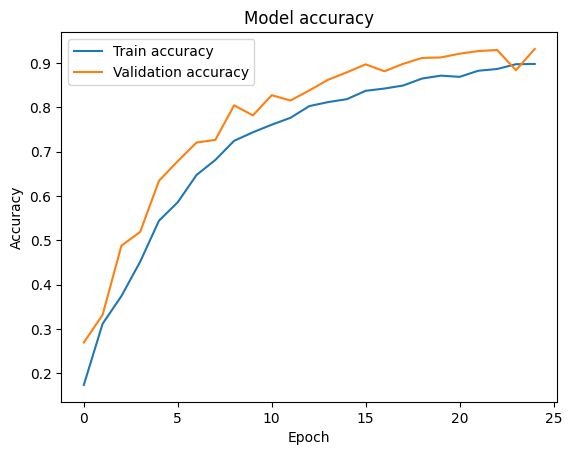

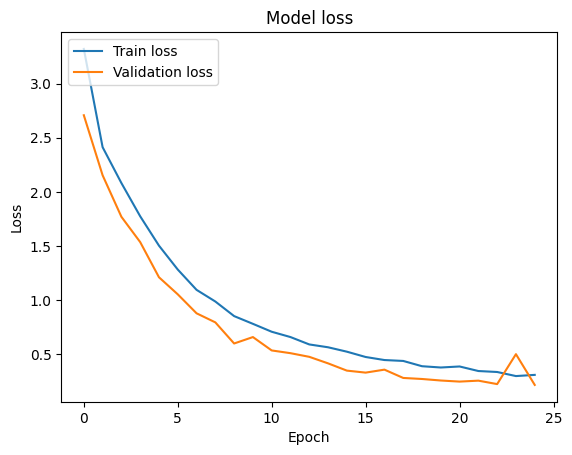

63/63 [==============================] - 1s 14ms/step


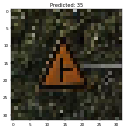

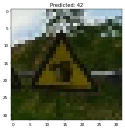

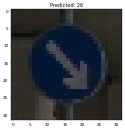

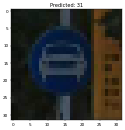

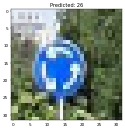

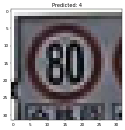

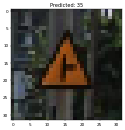

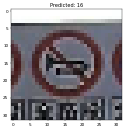

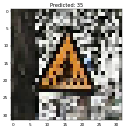

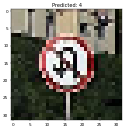

In [33]:
# Evaluate the model
scores = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation loss: {scores[0]}')
print(f'Validation accuracy: {scores[1] * 100}%')

# Predictions
predictions = model.predict(X_val)
y_true = y_val.argmax(axis=1)
y_pred = predictions.argmax(axis=1)

# Get the unique class indices in the validation set
unique_classes = np.unique(y_true)

# Get the corresponding class names
unique_class_names = lb.classes_[unique_classes]

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_class_names, yticklabels=unique_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report with zero_division=0
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, labels=np.arange(len(unique_class_names)), target_names=unique_class_names, zero_division=0))

# Visualize Training History (assuming history is defined)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Predict on Test Data
model.load_weights('best_traffic_sign_model.h5')
test_predictions = model.predict(test_data)
test_pred_labels = test_predictions.argmax(axis=1)

# Visualize Test Predictions
for i in range(10):
    plt.figure(dpi=30)
    plt.imshow(test_data[i])
    plt.title(f'Predicted: {lb.classes_[test_pred_labels[i]]}')
    plt.show()
